In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

# Load the data
data = pd.read_csv('merged_confidence_correctness.csv')

def calculate_roc_auc(data, model_name):
    confidence_col = f"{model_name}_confidence"
    correctness_col = f"{model_name}_correctness"
    
    valid_data = data[[confidence_col, correctness_col]].dropna()
    valid_data = valid_data[~valid_data[confidence_col].isin(['not_mentioned', 'cell_empty'])]
    valid_data = valid_data[pd.to_numeric(valid_data[confidence_col], errors='coerce').notnull()]
    
    if len(valid_data) == 0:
        return np.nan, "No valid data", {}
    
    y_true = valid_data[correctness_col].str.lower().isin(['correct', 'true', 'yes', '1']).astype(int)
    y_scores = valid_data[confidence_col].astype(float)
    
    if len(np.unique(y_true)) < 2:
        return np.nan, f"Only one class present in correctness: {np.unique(y_true)[0]}", {}
    
    if len(np.unique(y_scores)) < 2:
        return np.nan, f"Only one unique confidence score: {np.unique(y_scores)[0]}", {}
    
    try:
        auc = roc_auc_score(y_true, y_scores)
        accuracy = y_true.mean()
        avg_confidence = y_scores.mean()
        n_samples = len(y_true)
        
        stats = {
            "Accuracy": accuracy,
            "Avg Confidence": avg_confidence,
            "N Samples": n_samples,
            "Correct Avg Conf": y_scores[y_true == 1].mean(),
            "Incorrect Avg Conf": y_scores[y_true == 0].mean()
        }
        
        return auc, "Success", stats
    except ValueError as e:
        return np.nan, str(e), {}

model_names = [col.split('_confidence')[0] for col in data.columns if col.endswith('_confidence')]
results = {}
for model in model_names:
    auc_score, message, stats = calculate_roc_auc(data, model)
    results[model] = {'ROC_AUC': auc_score, 'Message': message, **stats}

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values('ROC_AUC', ascending=False)
print(results_df)

# Print detailed info for the bio_llm model
print("\nDetailed info for bio_llm model:")
bio_llm_data = data[['openbioLLM-7B-Q8_confidence', 'openbioLLM-7B-Q8_correctness']].dropna()
bio_llm_data = bio_llm_data[pd.to_numeric(bio_llm_data['openbioLLM-7B-Q8_confidence'], errors='coerce').notnull()]
print(bio_llm_data.describe())
print("\nConfidence distribution for correct answers:")
print(bio_llm_data[bio_llm_data['openbioLLM-7B-Q8_correctness'].str.lower() == 'correct']['openbioLLM-7B-Q8_confidence'].value_counts().sort_index())
print("\nConfidence distribution for incorrect answers:")
print(bio_llm_data[bio_llm_data['openbioLLM-7B-Q8_correctness'].str.lower() != 'correct']['openbioLLM-7B-Q8_confidence'].value_counts().sort_index())

                             ROC_AUC  Message  Accuracy  Avg Confidence  \
gpt-3.5-turbo-0125          0.625000  Success  0.500000        8.750000   
openbioLLM-7B-Q8            0.622596  Success  0.235294        9.352941   
gpt-4-0613                  0.605305  Success  0.665306        9.024490   
gpt-4o-2024-05-13           0.604065  Success  0.740072        8.859206   
MistralLarge-Poe            0.601812  Success  0.605351        8.130435   
claude-3-5-sonnet-20240620  0.600023  Success  0.740000        8.603333   
Llama3.1-405B               0.592062  Success  0.640000        8.473333   
gemma2-9b-it                0.591717  Success  0.445946        8.327703   
Phi3-medium14b-Q6           0.587774  Success  0.486667        8.573333   
GPT4Web                     0.587759  Success  0.662207        8.785953   
ClaudeOpuWeb-raw            0.577695  Success  0.656667        7.990000   
claude-3-opus-20240229      0.575303  Success  0.703518        8.537688   
Llama3-70b-Poe           

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

# Load the data
data = pd.read_csv('merged_confidence_correctness.csv')

def calculate_roc_auc(data, model_name):
    confidence_col = f"{model_name}_confidence"
    correctness_col = f"{model_name}_correctness"
    
    valid_data = data[[confidence_col, correctness_col]].dropna()
    valid_data = valid_data[~valid_data[confidence_col].isin(['not_mentioned', 'cell_empty'])]
    valid_data = valid_data[pd.to_numeric(valid_data[confidence_col], errors='coerce').notnull()]
    
    if len(valid_data) < 150:
        return np.nan, f"Insufficient samples: {len(valid_data)}", {}
    
    y_true = valid_data[correctness_col].str.lower().isin(['correct', 'true', 'yes', '1']).astype(int)
    y_scores = valid_data[confidence_col].astype(float)
    
    if len(np.unique(y_true)) < 2:
        return np.nan, f"Only one class present in correctness: {np.unique(y_true)[0]}", {}
    
    if len(np.unique(y_scores)) < 2:
        return np.nan, f"Only one unique confidence score: {np.unique(y_scores)[0]}", {}
    
    try:
        auc = roc_auc_score(y_true, y_scores)
        accuracy = y_true.mean()
        avg_confidence = y_scores.mean()
        n_samples = len(y_true)
        
        stats = {
            "Accuracy": accuracy,
            "Avg Confidence": avg_confidence,
            "N Samples": n_samples,
            "Correct Avg Conf": y_scores[y_true == 1].mean(),
            "Incorrect Avg Conf": y_scores[y_true == 0].mean()
        }
        
        return auc, "Success", stats
    except ValueError as e:
        return np.nan, str(e), {}

model_names = [col.split('_confidence')[0] for col in data.columns if col.endswith('_confidence')]
results = {}

for model in model_names:
    auc_score, message, stats = calculate_roc_auc(data, model)
    if stats.get('N Samples', 0) >= 150:
        results[model] = {'ROC_AUC': auc_score, 'Message': message, **stats}

# Convert results to a DataFrame and sort by AUC score
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values('ROC_AUC', ascending=False)

# Display results
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(results_df)

# Print models that were excluded due to insufficient samples
excluded_models = set(model_names) - set(results.keys())
print("\nModels excluded due to insufficient samples (<150):")
for model in excluded_models:
    _, message, _ = calculate_roc_auc(data, model)
    print(f"{model}: {message}")

                             ROC_AUC  Message  Accuracy  Avg Confidence  \
gpt-4-0613                  0.605305  Success  0.665306        9.024490   
gpt-4o-2024-05-13           0.604065  Success  0.740072        8.859206   
MistralLarge-Poe            0.601812  Success  0.605351        8.130435   
claude-3-5-sonnet-20240620  0.600023  Success  0.740000        8.603333   
Llama3.1-405B               0.592062  Success  0.640000        8.473333   
gemma2-9b-it                0.591717  Success  0.445946        8.327703   
Phi3-medium14b-Q6           0.587774  Success  0.486667        8.573333   
GPT4Web                     0.587759  Success  0.662207        8.785953   
ClaudeOpuWeb-raw            0.577695  Success  0.656667        7.990000   
claude-3-opus-20240229      0.575303  Success  0.703518        8.537688   
Llama3-70b-Poe              0.572296  Success  0.546667        8.380000   
gpt-4o-mini-2024-07-18      0.572277  Success  0.566102        8.752542   
GeminiWeb-raw            

In [13]:
results_df.head()

,ROC_AUC,Message,Accuracy,Avg Confidence,N Samples,Correct Avg Conf,Incorrect Avg Conf
gpt-4-0613,0.605305,Success,0.665306,9.024490,245,9.165644,8.743902
gpt-4o-2024-05-13,0.604065,Success,0.740072,8.859206,277,8.931707,8.652778
MistralLarge-Poe,0.601812,Success,0.605351,8.130435,299,8.292818,7.881356
claude-3-5-sonnet-20240620,0.600023,Success,0.740000,8.603333,300,8.662162,8.435897
Llama3.1-405B,0.592062,Success,0.640000,8.473333,300,8.552083,8.333333


In [14]:
results_df.to_csv('model_performance_results.csv')

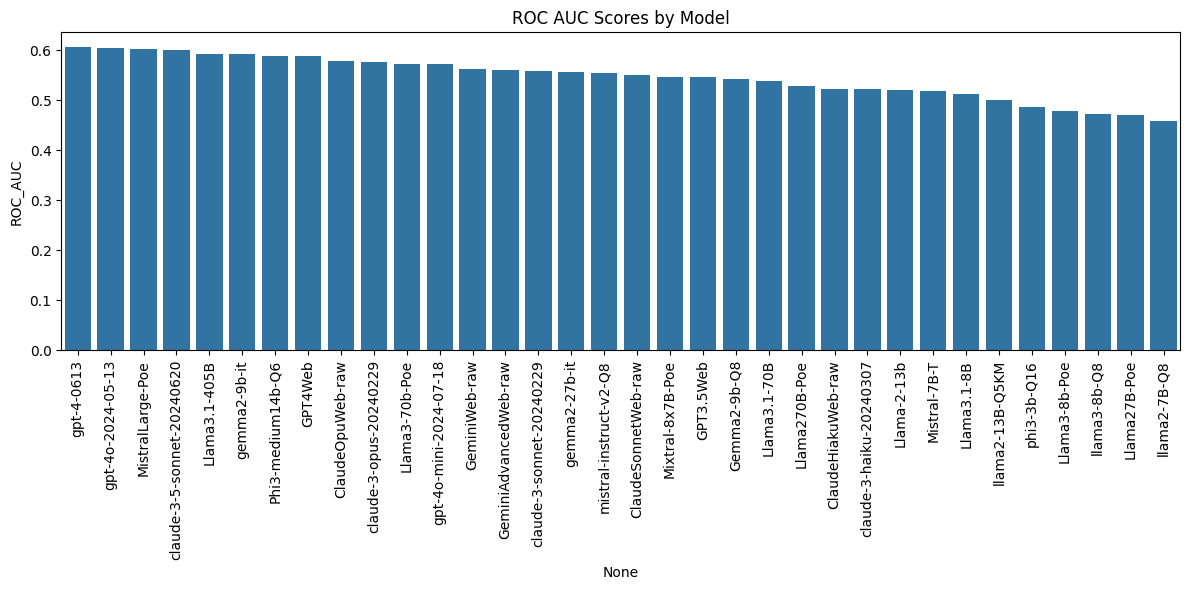

TypeError: 'bool' object is not iterable

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the results
results_df = pd.read_csv('model_performance_results.csv', index_col=0)

# Bar plot of ROC AUC scores
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='ROC_AUC', data=results_df)
plt.xticks(rotation=90)
plt.title('ROC AUC Scores by Model')
plt.tight_layout()
plt.show()

# DeLong's test for top two models
from scipy.stats import norm

def delong_roc_test(y_true, y_pred1, y_pred2):
    n = len(y_true)
    q1 = y_pred1[y_true == 1]
    q0 = y_pred1[y_true == 0]
    r1 = y_pred2[y_true == 1]
    r0 = y_pred2[y_true == 0]
    
    v10 = sum(q1 > q0) / (len(q1) * len(q0))
    v01 = sum(r1 > r0) / (len(r1) * len(r0))
    
    s10 = v10 * (1 - v10) / (n * len(q1) * len(q0))
    s01 = v01 * (1 - v01) / (n * len(r1) * len(r0))
    
    s11 = (sum((q1 > q0) & (r1 > r0)) / (len(q1) * len(q0)) - v10 * v01) / (n * len(q1) * len(q0))
    
    cov = s11 - s10 * s01
    se = (s10 + s01 - 2 * cov) ** 0.5
    z = (v10 - v01) / se
    
    return 2 * (1 - norm.cdf(abs(z)))

# Assuming you have the actual predictions for the top two models
# Replace these with your actual data
top_two_models = results_df.nlargest(2, 'ROC_AUC').index
y_true = [1, 0, 1, 1, 0]  # Example ground truth
y_pred1 = [0.9, 0.1, 0.8, 0.7, 0.3]  # Example predictions for model 1
y_pred2 = [0.8, 0.2, 0.7, 0.6, 0.4]  # Example predictions for model 2

p_value = delong_roc_test(y_true, y_pred1, y_pred2)
print(f"DeLong's test p-value for top two models: {p_value}")

C:\Users\Rayan\AppData\Local\Temp\ipykernel_12576\1281002422.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(model, (results_df['Accuracy'][i], results_df['ROC_AUC'][i]))


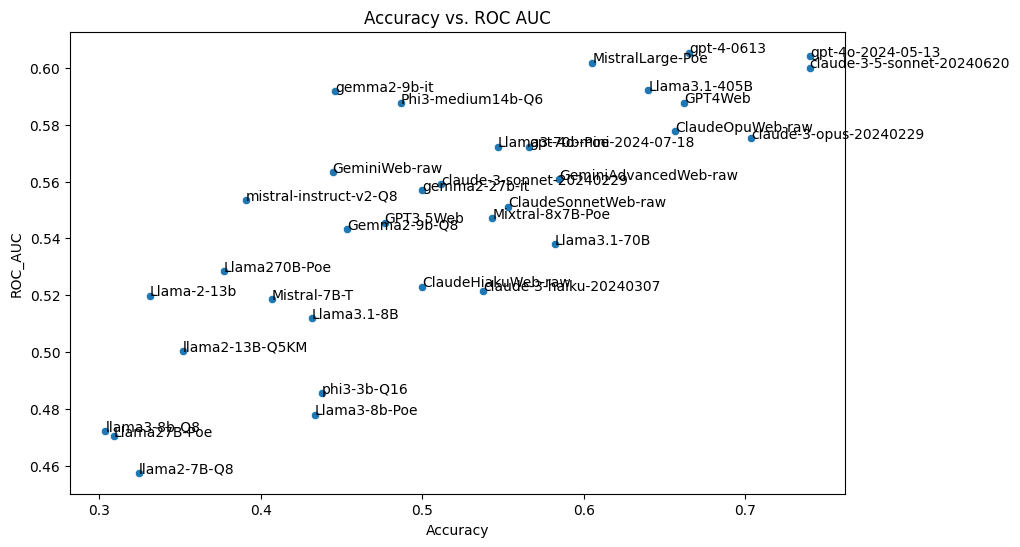

Models with large discrepancy between ROC AUC and Accuracy:
                             ROC_AUC  Accuracy
gpt-4o-2024-05-13           0.604065  0.740072
claude-3-5-sonnet-20240620  0.600023  0.740000
gemma2-9b-it                0.591717  0.445946
Phi3-medium14b-Q6           0.587774  0.486667
claude-3-opus-20240229      0.575303  0.703518
GeminiWeb-raw               0.563241  0.444444
mistral-instruct-v2-Q8      0.553571  0.390698
Llama270B-Poe               0.528523  0.377104
Llama-2-13b                 0.519848  0.331104
Mistral-7B-T                0.518673  0.406667
llama2-13B-Q5KM             0.500265  0.351648
llama3-8b-Q8                0.472264  0.303571
Llama27B-Poe                0.470373  0.308725
llama2-7B-Q8                0.457573  0.324561


In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Accuracy', y='ROC_AUC', data=results_df)
for i, model in enumerate(results_df.index):
    plt.annotate(model, (results_df['Accuracy'][i], results_df['ROC_AUC'][i]))
plt.title('Accuracy vs. ROC AUC')
plt.show()

# Identify outliers
threshold = 0.1  # Adjust as needed
outliers = results_df[(results_df['ROC_AUC'] - results_df['Accuracy']).abs() > threshold]
print("Models with large discrepancy between ROC AUC and Accuracy:")
print(outliers[['ROC_AUC', 'Accuracy']])

C:\Users\Rayan\AppData\Local\Temp\ipykernel_12576\3674711824.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(model, (results_df['Accuracy'][i], results_df['Avg Confidence'][i]),


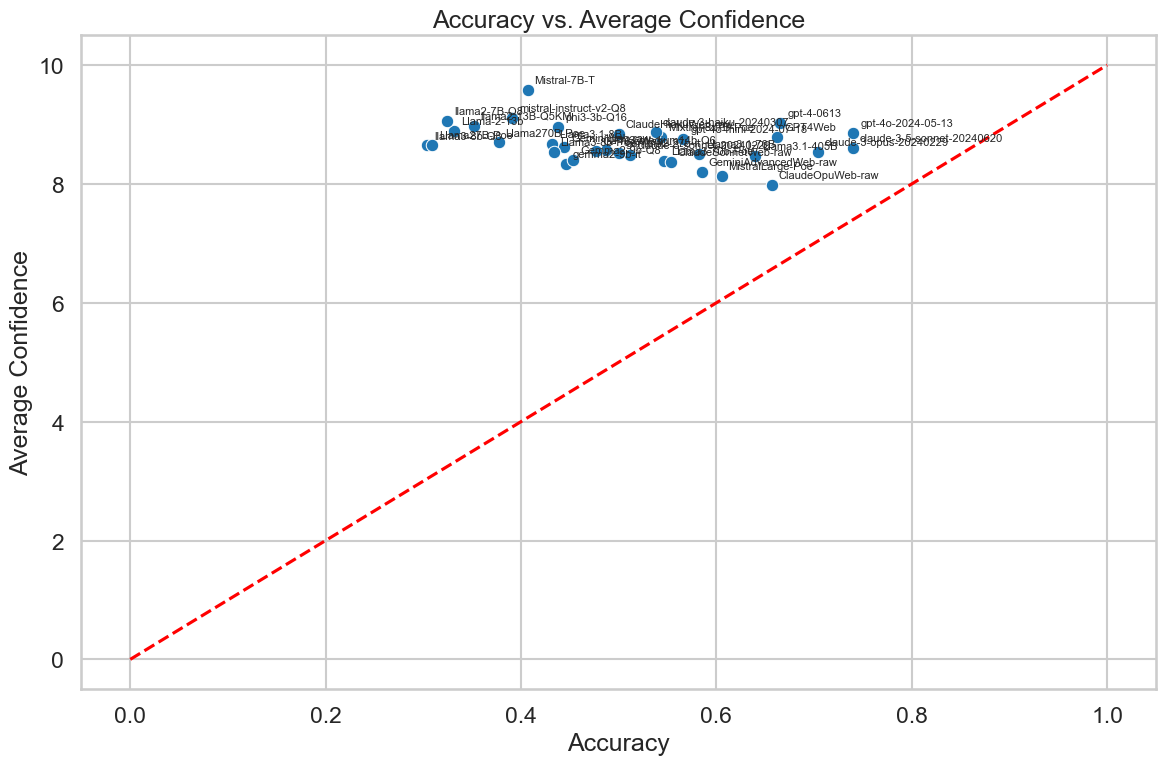

Estimated Brier scores (lower is better):
                            Accuracy  Avg Confidence  Estimated Brier Score
claude-3-5-sonnet-20240620  0.740000        8.603333               0.206880
gpt-4o-2024-05-13           0.740072        8.859206               0.207923
claude-3-opus-20240229      0.703518        8.537688               0.228642
ClaudeOpuWeb-raw            0.656667        7.990000               0.245775
GPT4Web                     0.662207        8.785953               0.267136
Llama3.1-405B               0.640000        8.473333               0.273387
gpt-4-0613                  0.665306        9.024490               0.277816
MistralLarge-Poe            0.605351        8.130435               0.281593
GeminiAdvancedWeb-raw       0.584906        8.200000               0.297451
Llama3.1-70B                0.581940        8.505017               0.312664
ClaudeSonnetWeb-raw         0.553333        8.370000               0.326125
Llama3-70b-Poe              0.546667        8.

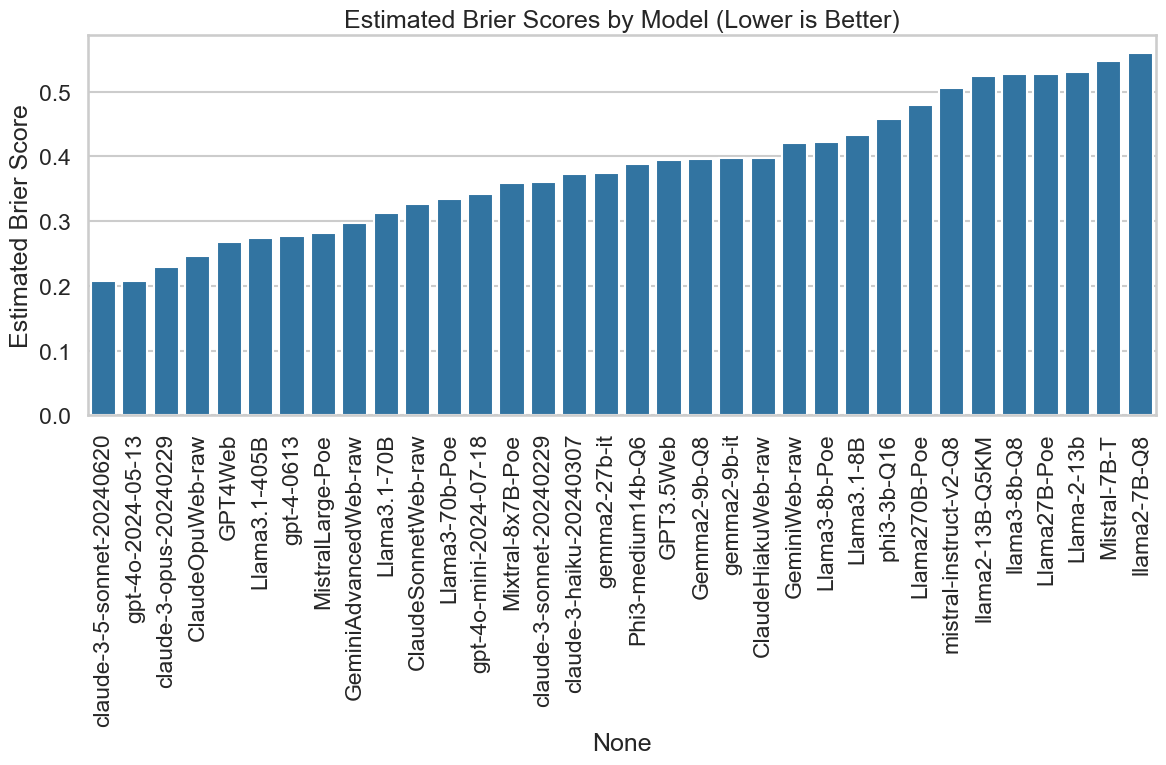

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import brier_score_loss
import numpy as np

# Load the results
results_df = pd.read_csv('model_performance_results.csv', index_col=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Accuracy', y='Avg Confidence', data=results_df)
for i, model in enumerate(results_df.index):
    plt.annotate(model, (results_df['Accuracy'][i], results_df['Avg Confidence'][i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.plot([0, 1], [0, 10], 'r--')  # Diagonal line
plt.title('Accuracy vs. Average Confidence')
plt.xlabel('Accuracy')
plt.ylabel('Average Confidence')
plt.tight_layout()
plt.show()

# Estimating Brier scores
def estimate_brier_score(accuracy, avg_confidence):
    # This is a rough estimation
    y_true = np.concatenate([np.ones(int(accuracy * 100)), np.zeros(int((1-accuracy) * 100))])
    y_pred = np.full_like(y_true, avg_confidence / 10)  # Assuming confidence is on a 0-10 scale
    return brier_score_loss(y_true, y_pred)

brier_scores = results_df.apply(lambda row: estimate_brier_score(row['Accuracy'], row['Avg Confidence']), axis=1)

# Adding Brier scores to the DataFrame
results_df['Estimated Brier Score'] = brier_scores

# Sorting and displaying results
results_df_sorted = results_df.sort_values('Estimated Brier Score')
print("Estimated Brier scores (lower is better):")
print(results_df_sorted[['Accuracy', 'Avg Confidence', 'Estimated Brier Score']])

# Plotting Brier scores
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df_sorted.index, y='Estimated Brier Score', data=results_df_sorted)
plt.xticks(rotation=90)
plt.title('Estimated Brier Scores by Model (Lower is Better)')
plt.tight_layout()
plt.show()

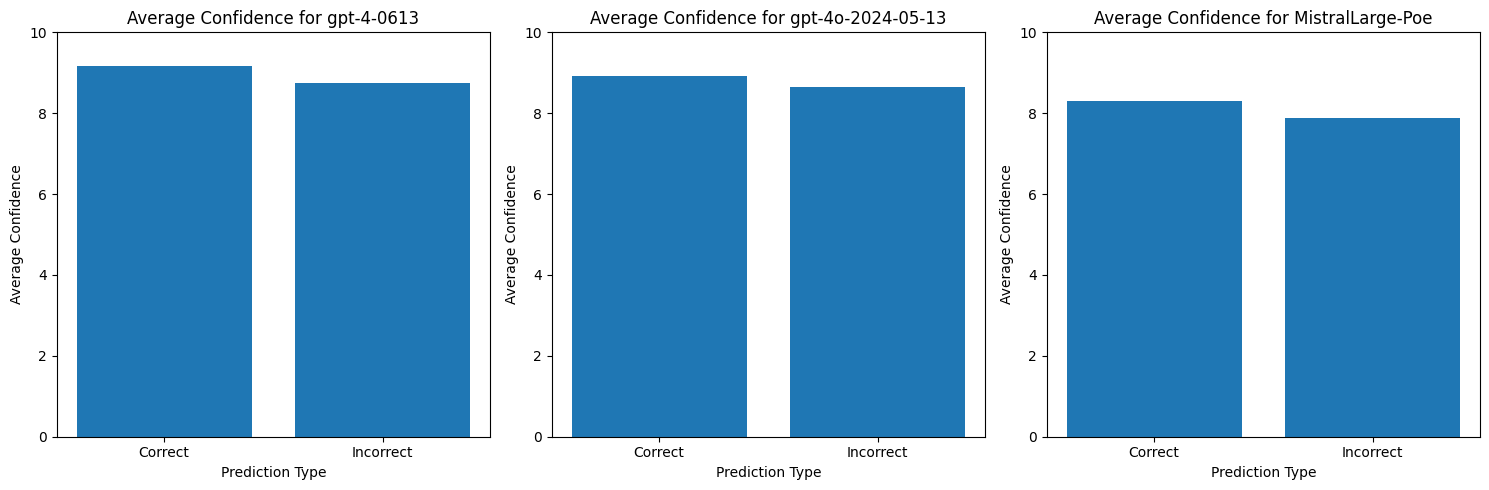


gpt-4-0613:
Correct Avg Conf: 9.16564417177914
Incorrect Avg Conf: 8.74390243902439

gpt-4o-2024-05-13:
Correct Avg Conf: 8.93170731707317
Incorrect Avg Conf: 8.652777777777779

MistralLarge-Poe:
Correct Avg Conf: 8.292817679558011
Incorrect Avg Conf: 7.88135593220339


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results
results_df = pd.read_csv('model_performance_results.csv', index_col=0)

top_models = results_df.nlargest(3, 'ROC_AUC').index

plt.figure(figsize=(15, 5))
for i, model in enumerate(top_models, 1):
    plt.subplot(1, 3, i)
    data = [
        results_df.loc[model, 'Correct Avg Conf'],
        results_df.loc[model, 'Incorrect Avg Conf']
    ]
    labels = ['Correct', 'Incorrect']
    plt.bar(labels, data)
    plt.title(f'Average Confidence for {model}')
    plt.xlabel('Prediction Type')
    plt.ylabel('Average Confidence')
    plt.ylim(0, 10)  # Assuming confidence is on a 0-10 scale

plt.tight_layout()
plt.show()

# Print the values for reference
for model in top_models:
    print(f"\n{model}:")
    print(f"Correct Avg Conf: {results_df.loc[model, 'Correct Avg Conf']}")
    print(f"Incorrect Avg Conf: {results_df.loc[model, 'Incorrect Avg Conf']}")

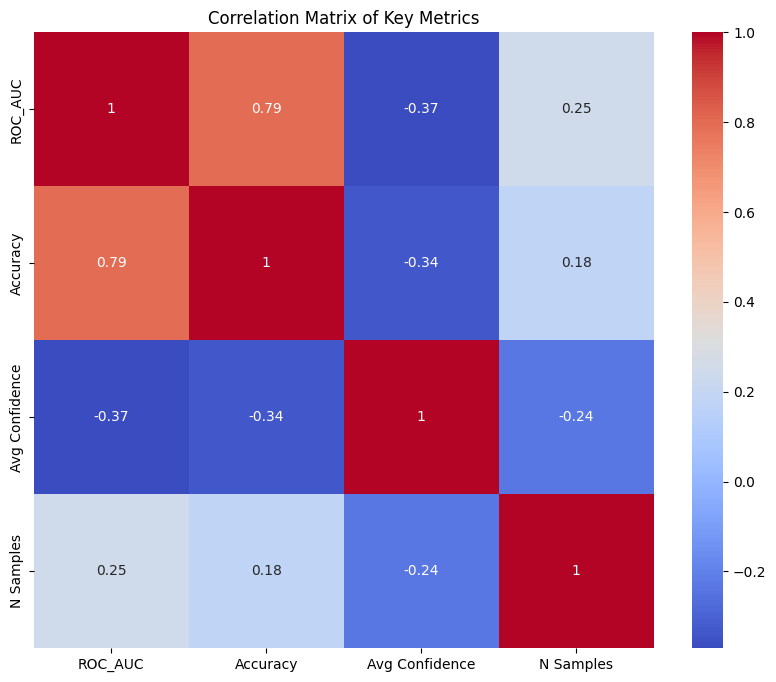

Correlation matrix:
                 ROC_AUC  Accuracy  Avg Confidence  N Samples
ROC_AUC         1.000000  0.794192       -0.371009   0.247513
Accuracy        0.794192  1.000000       -0.337393   0.179089
Avg Confidence -0.371009 -0.337393        1.000000  -0.236518
N Samples       0.247513  0.179089       -0.236518   1.000000


In [19]:
correlation_matrix = results_df[['ROC_AUC', 'Accuracy', 'Avg Confidence', 'N Samples']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Metrics')
plt.show()

print("Correlation matrix:")
print(correlation_matrix)

In [20]:
# Identify models with high ROC AUC but low accuracy
threshold_auc = results_df['ROC_AUC'].median()
threshold_acc = results_df['Accuracy'].median()
high_auc_low_acc = results_df[(results_df['ROC_AUC'] > threshold_auc) & (results_df['Accuracy'] < threshold_acc)]

print("Models with high ROC AUC but low accuracy:")
print(high_auc_low_acc[['ROC_AUC', 'Accuracy', 'Avg Confidence']])

# For these models, you'd need to analyze the specific errors they're making
# This would require access to the individual predictions, which we don't have in this summary data

Models with high ROC AUC but low accuracy:
                         ROC_AUC  Accuracy  Avg Confidence
gemma2-9b-it            0.591717  0.445946        8.327703
Phi3-medium14b-Q6       0.587774  0.486667        8.573333
GeminiWeb-raw           0.563241  0.444444        8.612903
mistral-instruct-v2-Q8  0.553571  0.390698        9.111628


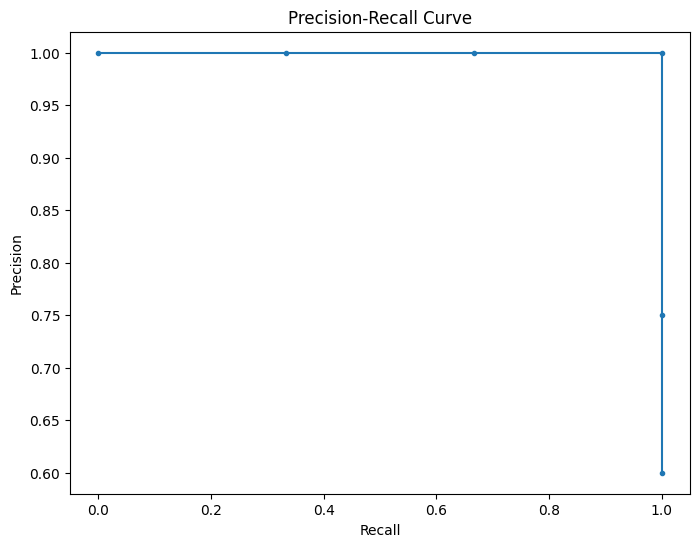

Optimal threshold: 0.7


In [21]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Assuming you have predictions for a specific model
# Replace these with your actual data
y_true = [1, 0, 1, 1, 0]  # Example ground truth
y_scores = [0.9, 0.1, 0.8, 0.7, 0.3]  # Example prediction scores

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Find optimal threshold (e.g., F1 score)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold}")